### <h1><span style='color:#a53860'> Anatomy of a Viral Moment</span></h1>

To learn what kinds of data and analyses I could glean from Twitter using Python, I pulled over 13,500 Tweets posted during the live broadcast of the 2022 Academy Awards on March 27, 2022, from around the moment actor Will Smith slapped comedian Chris Rock, until a few moments after Smith accepted the award for Best Actor. In Pacific time, about 7:27pm to about 8:30pm.

I used [Tweepy](https://www.tweepy.org/) to access the Twitter API and returned results in a Jupyter notebook. Specifically, I searched for Tweets that included the words "will" and "slap" as well as Tweets that included "oscars" and "slap," excluding retweets. This is not a total list of Tweets during this time period, mainly due to limitations using Twitter's (free) Elevated API (versus Academic or Enterprise). I then created a dataframe with pandas, learned various facts and created data visualizations.

<h3><span style='color:#a53860'> Importing Libraries and Preparing the Data</span></h3>

In [4]:
# Importing libraries

import os
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import matplotlib.dates as mdates
from pandas import DataFrame
from datetime import datetime
from matplotlib.dates import date2num
from pandas import Series
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [5]:
# Merging many files of Tweets

merged = os.path.join("Tweets/tweets*.csv")
tweets = glob.glob(merged)
df = pd.concat(map(pd.read_csv, tweets), ignore_index=True)

Let's check out what I've got to work with.

In [6]:
# Looking at the data. (I changed the column titles in the data collection process.) 

df.head()

,Time,Tweet,Source,ID,Name,Username,Location,Verified?,Bio
0,2022-03-28 02:28:24+00:00,Man wtf why tf would will smith slap chris roc...,Twitter for iPhone,1508269746684416001,Camyoncè 🐝,cammybad_azz,"Atlanta, GA",False,22 with NO KIDS! Snapchat: xxwallywah travel h...
1,2022-03-28 02:28:24+00:00,Wait. Did Will Smith really slap Chris Rock an...,Twitter for iPhone,1508269744666943502,Bryan Levine,Bryan_Levine,Florida,True,"Likely tweeting about sports, music, Seinfeld ..."
2,2022-03-28 02:28:23+00:00,Did Will Smith just slap the shit out of Chris...,Twitter for iPhone,1508269742972452875,T-Hill,iambiggum,Oak Cliff Tx.,False,Living life to the fullest extent follow my IG...
3,2022-03-28 02:28:23+00:00,did will just slap the piss outta em,Twitter for iPhone,1508269742087413763,Jarred,JarreDuhh,NaN,False,Sports Junkie. Living for my Nanna and Granny ...
4,2022-03-28 02:28:23+00:00,@KarinaAnglada Did Will Smith really just slap...,Twitter for iPhone,1508269741726736385,Mhovey,MarkHoversen,NaN,False,Truth is.......I am Iron Man


Can we sort by time and get the first 10 Tweets in our dataframe, from the first seconds after it happened?

In [7]:
# Converting the Time field from UTC to Pacific time (where I live)

df['Time'] = pd.to_datetime(df.Time, format='%Y-%m-%d %H:%M:%S')
df['Time'] = df['Time'].dt.tz_convert('US/Pacific')

# Sorting to see the first Tweets

df_bytime = df.sort_values(by='Time', ascending=True)

df_bytime.head()

,Time,Tweet,Source,ID,Name,Username,Location,Verified?,Bio
99,2022-03-27 19:27:34-07:00,UHHHHHH DID WILL SMITH JUST SLAP AND CUSS AT C...,Twitter for iPhone,1508269538332323843,Ash ⁷ ☻ ✜ ⟬⟭,kookiesnaega,The Streets of Gwanju & Busan,False,"uhhhh I like BTS, Anime, and Animal Crossing. ..."
98,2022-03-27 19:27:36-07:00,Did will smith just bitch slap Chris rock…I lo...,Twitter for iPhone,1508269545823379459,dee,dblit99,NaN,False,they/them // I’m currently writing stuff! chec...
97,2022-03-27 19:27:37-07:00,Was that a real slap? #Oscars,Twitter for Android,1508269550139285512,𝔸𝕝𝕚 B,Lici430,"Bronx, NY",False,"Pop Culture Fiend, HP Blerd, Trying to Survive..."
96,2022-03-27 19:27:37-07:00,omg did will smith just slap chris rock? #Oscars,Twitter for iPhone,1508269550898401280,ᴀ ʟ ᴏ ᴅ ɪ ᴇ,sasssypanties,jersey 🌻,False,"yes, i love the red sox 🇩🇴"
95,2022-03-27 19:27:38-07:00,what the fuck. did will really slap him #Oscars,Twitter for iPhone,1508269552265834502,Rahim,rahim77905922,NaN,False,"GO BUCKS. Warriors and Manchester untied, J.co..."


Looks like we have Tweets starting from 7:27:34pm Pacific!

In [8]:
# Checking to see how many I have

df['Tweet'].count()

13529

In [9]:
# Making sure I didn't accidentally grab any duplicates

duplicates = df[df.duplicated(['ID'])]
duplicates

,Time,Tweet,Source,ID,Name,Username,Location,Verified?,Bio


<h2><span style='color:#a53860'> Let's Start Analyzing!</span></h2>
<h3><span style='color:#a53860'>Did People Think It Was Staged?</span></h3>

In [10]:
# Finding all the Tweets in our dataframe including the word "fake" or "staged" or the phrase "was that real"

fake = df.loc[df['Tweet'].str.contains("fake", case=False)]
real = df.loc[df['Tweet'].str.contains("was that real", case=False)]
staged = df.loc[df['Tweet'].str.contains("staged", case=False)]

doubters = [fake, real, staged]
slaptruthers = pd.concat(doubters)

slaptruthers['Tweet'].count()

928

In [11]:
len(slaptruthers) / len(df) * 100

6.859339197279918

<div style="background-color: #ffeedb ; padding: 10px; color: #4c3b4d;"><strong>At least 6.8% of people Tweeting in the moment expressed skepticism about whether the slap was real or a bit for the show!</strong></div>

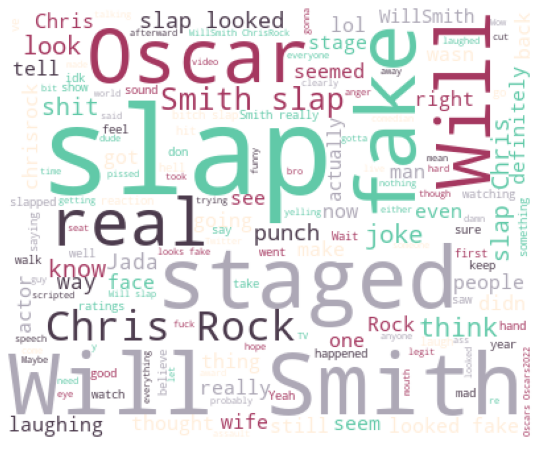

In [12]:
# Creating a simple Wordcloud from the "slaptruthers" dataframe, with custom colors

colors =["#ada8b6", "#ffeedb", 
         "#4c3b4d", "#a53860", "#61c9a8"]

cmap = matplotlib.colors.ListedColormap(colors)
stop_words = ["https", "co", "tco", "s", "m", "t", "amp"] + list(STOPWORDS)
wordcloud = WordCloud(stopwords = stop_words, width=400,height=330, colormap=cmap, max_words=150,background_color="white").generate(' '.join(slaptruthers['Tweet']))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig("staged.jpg")
plt.show()

<h3><span style='color:#a53860'>Can We Learn Anything Interesting from the Most-Used Hashtags?</span></h3>

In [13]:
# Extracting the top 10 most-used hashtags

df['Tweet'].str.extractall(r'(\#\w+)').value_counts().nlargest(10)

#Oscars           3010
#WillSmith         537
#Oscars2022        395
#oscars            258
#ChrisRock         198
#chrisrock         192
#slap              151
#Oscar             147
#willsmith         125
#AcademyAwards      69
dtype: int64

<h3><span style='color:#a53860'>Hmm, Not Much Unexpected There. What About the Top Mentions?</span></h3>

In [15]:
# Extracting the top 10 most-used @ mentions

df['Tweet'].str.extractall(r'(\@\w+)').value_counts().nlargest(10)

@chrisrock          229
@willsmith          148
@davidmackau         45
@barstoolsports      42
@stephenasmith       41
@Variety             40
@bubbaprog           36
@stoolpresidente     31
@ClayTravis          26
@TheAcademy          25
dtype: int64

Wait ... "@davidmackau"? Who's That?

In [16]:
# Looking at Tweets mentioning this person

df.loc[df['Tweet'].str.contains("@davidmackau", case=False, na=False)].head()

,Time,Tweet,Source,ID,Name,Username,Location,Verified?,Bio
350,2022-03-27 20:16:09-07:00,"@wrldgrlbmp @davidmackau No, violence is viole...",Twitter for iPhone,1508281762677370885,Grandmasagainsttrump,grandmaresist,"California, USA",False,Vietnam Veteran. Between Dem and Progressive. ...
518,2022-03-27 20:16:54-07:00,"@davidmackau @LanceZierlein Yeah bro, I aint j...",Twitter for iPhone,1508281953778384906,NativeTexan,peaklover16,NaN,False,NaN
645,2022-03-27 20:17:14-07:00,@DanRichards_PA @davidmackau Omg 😱 will assaul...,Twitter for iPhone,1508282033973473294,Lisa long,Lisalon32319664,NaN,False,"I love reading, music, movies, walking my dog ..."
646,2022-03-27 20:17:14-07:00,"@davidmackau @__BigO__ Ik one thing, I'd be qu...",Twitter for iPhone,1508282033675644932,𝑰𝑷𝒖𝒕𝑨𝑺𝒑𝒆𝒍𝒍𝑶𝒏𝒀𝒐𝒖🫀⛓,NelliSky_,"Cockeysville, MD",False,🌻𝙃𝙚𝙖𝙫𝙮 𝘰𝘯 𝘌𝘷𝘦я𝘺𝘵𝘩𝘪𝘯𝘨 𝘐 𝙇𝙤𝙫𝙚 𝘐 𝘬𝘦𝘦𝘱 𝙥я𝙞𝙫𝙖𝙩𝙚 🤍²....
661,2022-03-27 20:17:12-07:00,@davidmackau Open hand slap not a punch. Man d...,Twitter Web App,1508282028382425094,Catnip🐾 Creek,CatnipCreek,"Kansas City, MO area",False,Retired Univ Faculty & Researcher. 🐾 Owned by...


I looked up that Tweet using its unique Tweet ID (https://twitter.com/grandmaresist/status/1508281762677370885) and I could see the Tweet they're commenting on. Below, I will embed it:

In [3]:
# Embedding the Tweet in Jupyter

class Tweet(object):
    def __init__(self, embed=None):
        self.embed = embed

    def _repr_html_(self):
        return self.embed

s = ("""
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">UNCENSORED WILL SMITH FOOTAGE AS SHOWN ON AUSTRALIAN TV <a href="https://t.co/NcRfdjWxqe">pic.twitter.com/NcRfdjWxqe</a></p>&mdash; David Mack (@davidmackau) <a href="https://twitter.com/davidmackau/status/1508270575902687232?ref_src=twsrc%5Etfw">March 28, 2022</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
""")

Tweet(s)

<i><small>[source for the code above to embed Tweets](https://github.com/jupyter/notebook/issues/2790)</i></small>

Ah, okay, this explains it. Australian TV (among other foreign outlets) broadcast the moment uncensored, and Australian journalist David Mack was one of the first notable accounts to post footage to Twitter. 

<h3><span style='color:#a53860'>How Were the Tweets Spread Out?</span></h3>

In [18]:
# Grouping in 6-minute intervals

df_tweetsbytime = df.groupby(pd.Grouper(key='Time',  freq='6Min')).size()
df_tweetsbytime

Time
2022-03-27 19:24:00-07:00     400
2022-03-27 19:30:00-07:00     897
2022-03-27 19:36:00-07:00     781
2022-03-27 19:42:00-07:00     785
2022-03-27 19:48:00-07:00    1107
2022-03-27 19:54:00-07:00    1271
2022-03-27 20:00:00-07:00    1617
2022-03-27 20:06:00-07:00    1654
2022-03-27 20:12:00-07:00    1546
2022-03-27 20:18:00-07:00    1799
2022-03-27 20:24:00-07:00    1672
Freq: 6T, dtype: int64

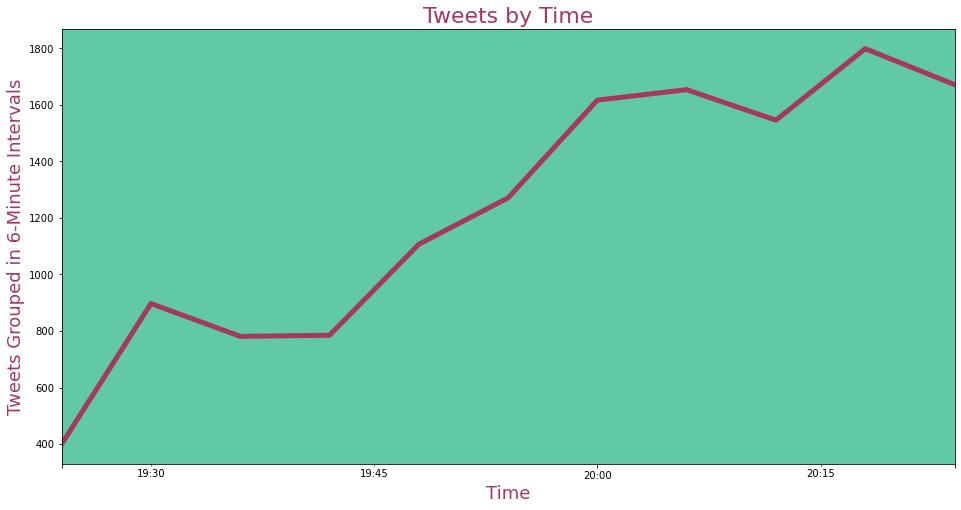

In [19]:
# Creating a time series plot

ax = plt.axes() 
ax.set_facecolor("#61c9a8")
df_tweetsbytime.plot(color='#a53860',linewidth=5, figsize=(16,8) )
plt.xlabel('Time', size=18, color="#a53860")
plt.ylabel('Tweets Grouped in 6-Minute Intervals', size=18, color="#a53860")
plt.title('Tweets by Time', size=22, color='#a53860', loc='center') 
plt.savefig("time.jpg")
plt.show;

<i><small>[source for the code above to group Tweets by time and plot results](https://cvw.cac.cornell.edu/PyDataSci1/tweets_retweets)</i></small>

<h3><span style='color:#a53860'>Let's Dig Into Our Users a Bit More ...</span></h3>

What was the most-often used hashtag in user bios?

In [20]:
# Searching users' bios for hashtags and sorting

df['Bio'].str.extractall(r'(\#\w+)').value_counts().nlargest(10)

#BLM                  81
#BlackLivesMatter     80
#1                    54
#LakeShow             22
#Bitcoin              17
#FlyEaglesFly         16
#blacklivesmatter     16
#LGBTQIA              16
#CancelStudentDebt    16
#Resist               15
dtype: int64

And the top mentions?

In [21]:
# Searching users' bios for @ mentions and sorting

df['Bio'].str.extractall(r'(\@\w+)').value_counts().nlargest(10)

@gmail          199
@yahoo           12
@Twitch          10
@BTS_twt          8
@Variety          7
@Forbes           6
@iHeartRadio      6
@Marvel           5
@ABC              5
@kmbc             5
dtype: int64

How many verified users were Tweeting in the moment?

In [22]:
# Searching for verified users and calculating the percentage out of our entire dataframe

bluechecks = df['Verified?'] == True
len(df[bluechecks]) / len(df) * 100

3.5331510089437503

<div style="background-color: #ffeedb ; padding: 10px; color: #4c3b4d;"><strong>At least 3.53% of people Tweeting about the slap were verified users.</strong></div>

How do our users describe themselves in their bios?

In [23]:
# Making sure I'm eliminating users who left their bios blank

bios_notnull = df.loc[df['Bio'].notnull(), :]

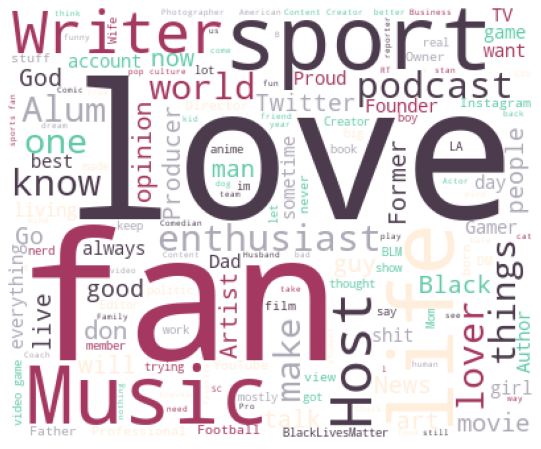

In [24]:
# Creating a Wordcloud from users' bios with custom colors

colors =["#ada8b6", "#ffeedb", 
         "#4c3b4d", "#a53860", "#61c9a8"]

cmap = matplotlib.colors.ListedColormap(colors)
stop_words = ["https", "co", "tco", "t", "s", "m", "thing", "IG", "tweet", "tweets", "time", "new", "gmail", "follow", "u", "link"] + list(STOPWORDS)
wordcloud = WordCloud(stopwords = stop_words, width=400,height=330, colormap=cmap, max_words=150,background_color="white").generate(' '.join(bios_notnull['Bio']))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig("bios.jpg")
plt.show()

<h3><span style='color:#a53860'>How Were People Tweeting?</span></h3>

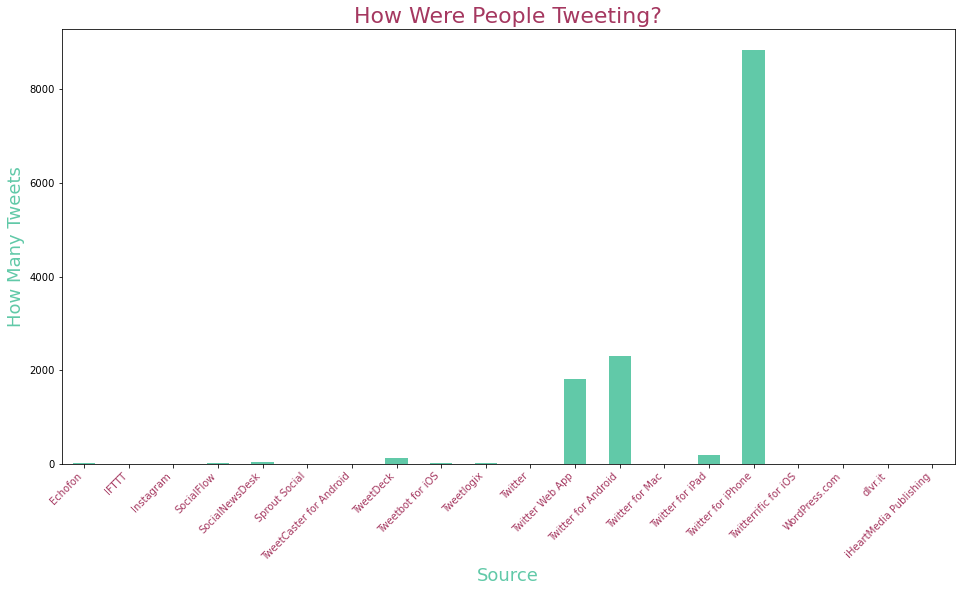

In [25]:
# Creating a simple bar graph with custom colors based on Twitter's Source field

plt.figure(figsize=(16,8))
df['Source'].value_counts().nlargest(20).sort_index().plot(kind='bar', color="#61c9a8", figsize=(16,8));
plt.xlabel('Source', size=18, color="#61c9a8")
plt.ylabel('How Many Tweets', size=18, color="#61c9a8")
plt.title('How Were People Tweeting?', size=22, color='#a53860', loc='center')
plt.xticks(rotation=45, ha="right", color='#a53860')
plt.savefig("source.jpg");

Looks like Twitter for iPhone is the winner!

<h3><span style='color:#a53860'>Did Some People Post More Than Once?</span></h3>

In [26]:
# Searching for duplcates of the Username field

power_users = df[df.duplicated(['Username'])]
power_users['Username'].value_counts().head(10)

gizzle_my          14
scheel_lala        14
MediaWatchOz        6
LRgarciajr          5
DavidNSch           5
mint_everything     5
AlexScarpelli1      4
ShelettaIsFunny     3
thelibrarybird      3
Sonof_Mosta         3
Name: Username, dtype: int64

<h3><span style='color:#a53860'>What Can We Do With Twitter's Location Data?</span></h3>

Let's review [U.S. Census data](https://www.census.gov/data/tables/time-series/demo/popest/2010s-total-cities-and-towns.html) to find the top 10 U.S. cities by population:

- New York City, New York
- Los Angeles, California
- Chicago, Illinois
- Houston, Texas
- Phoenix, Arizona
- Philadelphia, Pennsylvania
- San Antonio, Texas
- San Diego, California
- Dallas, Texas
- San Jose, California

We'll look at those cities in our dataframe. Will we see our Tweets from these cities correspond to their population status? Bear in mind that many people don't fill out their Location data on Twitter, or they may do it in a way outside of convention ("L.A." instead of "Los Angeles" for example), so this will just be a sampling of data. 

In [27]:
# Searching Twitter location data for corresponding terms

la = df.loc[df['Location'].str.contains("Los angeles", case=False, na=False)]
nyc = df.loc[df['Location'].str.contains("new york city", case=False, na=False)]
nyc2 = df.loc[df['Location'].str.contains("nyc", case=False, na=False)]
chicago = df.loc[df['Location'].str.contains("chicago", case=False, na=False)]
houston = df.loc[df['Location'].str.contains("Houston", case=False, na=False)]
phoenix = df.loc[df['Location'].str.contains("Phoenix", case=False, na=False)]
philadelphia1 = df.loc[df['Location'].str.contains("Philadelphia", case=False, na=False)]
philadelphia2 = df.loc[df['Location'].str.contains("Philly", case=False, na=False)]
sanantonio = df.loc[df['Location'].str.contains("San Antonio", case=False, na=False)]
sandiego = df.loc[df['Location'].str.contains("San Diego", case=False, na=False)]
dallas = df.loc[df['Location'].str.contains("dallas", case=False, na=False)]
sanjose = df.loc[df['Location'].str.contains("San Jose", case=False, na=False)]

In [28]:
# Cleaning up New York City and Philadelphia

nycdata = [nyc, nyc2]
newyorkcity = pd.concat(nycdata)

phillydata = [philadelphia1, philadelphia2]
philadelphia = pd.concat(phillydata)

By running "la['Tweet'].count()," "newyorkcity['Tweet'].count()", etc., I was able to pull the cities' Tweet counts.

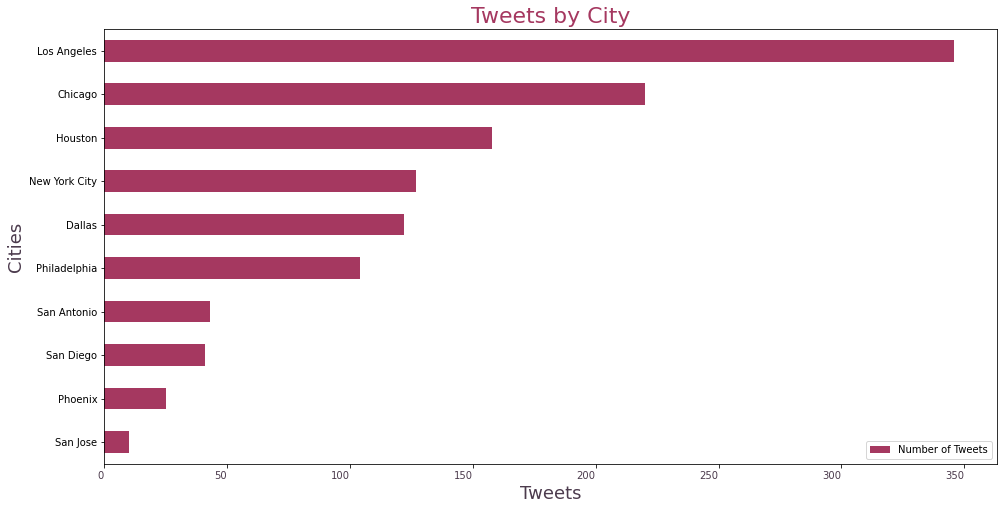

In [29]:
# Creating a simple horizontal bar graph below based on the city/Tweet count data

tweet_city = pd.DataFrame({'Cities': ['San Jose', 'Phoenix', 'San Diego', 'San Antonio', 
                                      'Philadelphia', 'Dallas', 'New York City', 'Houston', 'Chicago', 'Los Angeles'],
                           'Number of Tweets': [10, 25, 41, 43, 104, 122, 127, 158, 220, 346]})

tweet_city.plot.barh(x='Cities', y='Number of Tweets', color='#a53860',figsize=(16,8) )
plt.xlabel('Tweets', size=18, color="#4c3b4d")
plt.ylabel('Cities', size=18, color="#4c3b4d")
plt.title('Tweets by City', size=22, color='#a53860', loc='center')
plt.xticks(ha="right", color='#4c3b4d');

Probably not too surprising that Los Angeles tops the list! Interesting that New York wasn't higher and Dallas seems overrepresented.

<h3><span style='color:#a53860'> Conclusions ...</span></h3>

You can see how the breadth of information available from even a handful of Twitter fields, combined with Python's data analysis capabilities, make for a powerful combo for many purposes, like academic research, political research, a small non-profit, or a business or brand to learn about their customers of competitors, just to name a few.
